## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [6]:
df = pd.read_csv('CC_GENERAL.csv')

In [7]:
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df = df.fillna(0)
df.drop(['CUST_ID'], axis=1, inplace=True)



In [9]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
#df = pd.get_dummies(df)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [12]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.2973097 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.10204243,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.08848934,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32175099,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33316552,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.31923775,
        -0.52555097, -4.12276757]])

## K-Means

Find the optimal Kmeans model

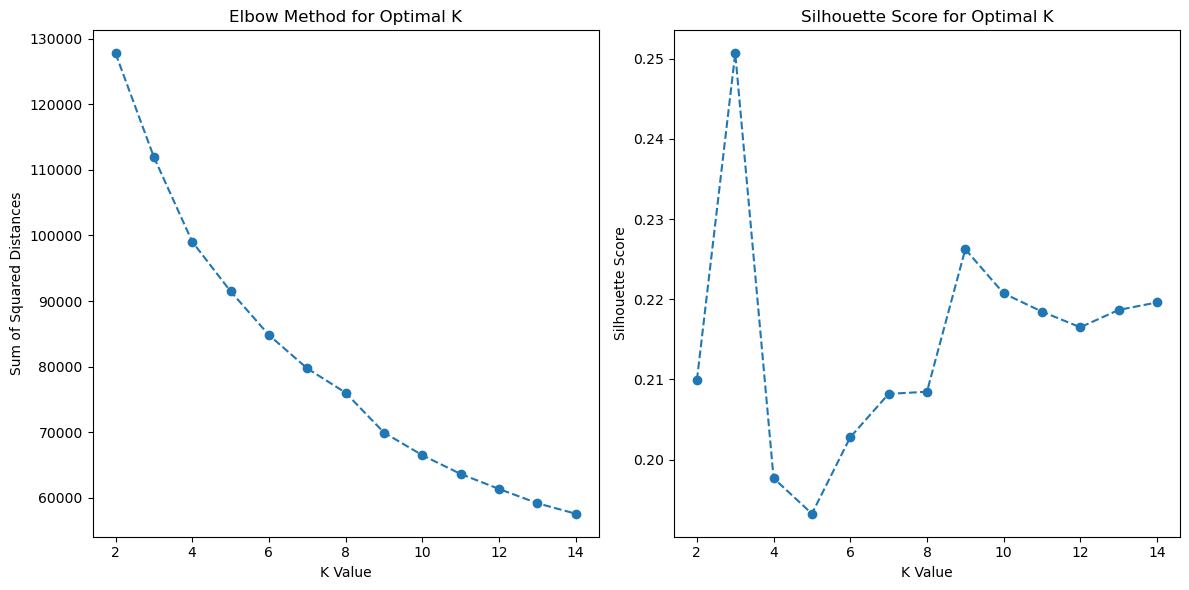

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ssd = []
silhouette_scores = []

# Your code here
for k in range(2, 15):
    model = KMeans(n_clusters=k, init='k-means++')
    model.fit(scaled_df)
    
    # Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    
    # Calculate silhouette score
    labels = model.labels_
    silhouette_scores.append(silhouette_score(scaled_df, labels))

# Plot SSD
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 15), ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method for Optimal K")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 15), silhouette_scores, 'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")

plt.tight_layout()
plt.show()

Choose the optimal K and calculate the silhouette score for the best model.

<Axes: >

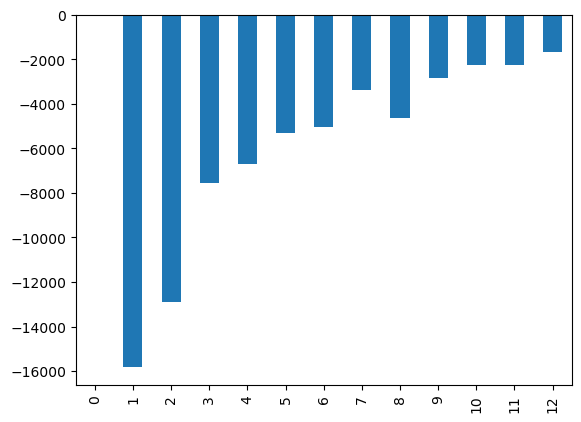

In [45]:
pd.Series(ssd).diff().plot(kind='bar')

In [59]:
model1 = KMeans(n_clusters=3, init='k-means++')

cluster_labels1 = model.fit_predict(scaled_df)
cluster_labels1

array([ 2,  9,  1, ..., 13, 13, 13])

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [71]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

s=[]
linkage_list=["average"]
affinity_list=["euclidean"]
n=np.arange(3,7)
best=-1
best_affinity=" "
best_n=1
best_linkage= " "
for n_clusters in n:
    for affinity in affinity_list:
           for linkage in linkage_list:
                model = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
                model = model.fit(scaled_df)
                silhouette=silhouette_score(scaled_df,model.labels_)#,metric='euclidean')
                s.append(silhouette)
                #print("Silhouette Score for number of clusters = "+ str(n_clusters)+ " "+str(affinity)+" and "+str(linkage)+" is "+str(silhouette)+".")
                if silhouette >= best:
                    best_n=n_clusters
                    best =silhouette 
                    best_affinity=affinity
                    best_linkage=linkage
print("Best agglomerative clustering model for this data is number of clusters="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Best agglomerative clustering model for this data is number of clusters= 3 with linkage of average and affinity of euclidean.Silhouette Score is 0.8391259092193835.


Choose the optimal K and calculate the silhouette score for the best model.

In [75]:
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "average")
cluster_labels2 = model.fit_predict(scaled_df)

## DBSCAN

Find the optimal DBSCAN model.

Text(0.5, 0, 'Epsilon Value')

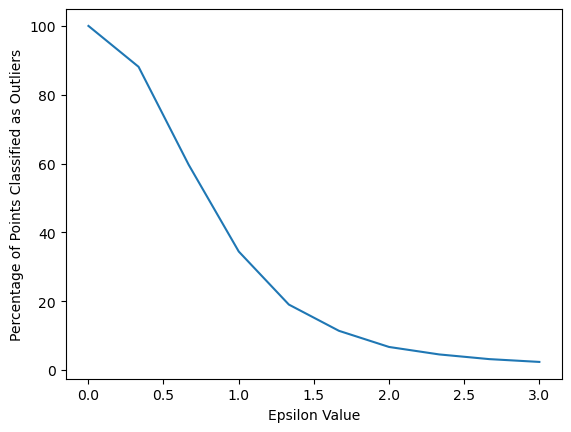

In [79]:
from sklearn.cluster import DBSCAN
outlier_percent = []

for eps in np.linspace(0.001,3,10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(scaled_df)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)
    
    outlier_percent.append(perc_outliers)
sns.lineplot(x=np.linspace(0.001,3,10),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")    

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [83]:
dbscan = DBSCAN(eps=0.25)
cluster_labels3 = dbscan.fit_predict(scaled_df)

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

In [85]:
from sklearn.metrics import silhouette_score

# Assuming scaled_df is your data and cluster_labels1, cluster_labels2, cluster_labels3 are your cluster labels
silhouette_score1 = silhouette_score(scaled_df, cluster_labels1)
silhouette_score2 = silhouette_score(scaled_df, cluster_labels2)
silhouette_score3 = silhouette_score(scaled_df, cluster_labels3)

print(f'Silhouette Score for cluster_labels1: {silhouette_score1}')
print(f'Silhouette Score for cluster_labels2: {silhouette_score2}')
print(f'Silhouette Score for cluster_labels3: {silhouette_score3}')

Silhouette Score for cluster_labels1: 0.19525866759543403
Silhouette Score for cluster_labels2: 0.8391259092193835
Silhouette Score for cluster_labels3: -0.4337476654940265
